# Computação Científica Voltada para a Engenharia - Problemas Matemáticos Usando Python

## Tópico 1 - Série de Taylor

Por Thiago Barros

Em matemática, existem diversos funções que não possuem solução real calculável. Equações como as de Navier Stokes que sevem para determinar propriedades do fenômeno da turbulência não possuem solução real ainda e para encontrar resultados utilizando essas equações é preciso utilizar ferramentas numéricas. Vamos supor que não sabemos calcular o valor de uma função para um polinômio simples e desejamos determinar o valor dessa função usando um valor aproximado.

n está associado com a ordem da derivada que se tem do polinômio.

$$
\begin{aligned}
f(x) = \cos(x)
\end{aligned}
$$

Vamos supor que queremos calcular o valor de f(x) o y para: $$\frac{\pi}{3}$$

Um método que podemos utilizar é aproximando o valor da função utilizando a Série de Taylor. A Série de Taylor é uma série numérica que é um resultado do trabalho do Brook Taylor e do d'Alembert que busca aproximar um valor de um polinômio por meio da segunte série numérica:

$$
\begin{aligned}
f(x) = f(x_{0}) + \frac{f'(x_{0})}{1!} \times (x - x_{0})^1 + \frac{f''(x_{0})}{2!} \times (x - x_{0})^2 + \dots + \frac{f^{(n)}(x_{0})}{n!} \times (x - x_{0})^n
\end{aligned}
$$

O que fazemos é uma soma infinita usando os valores das ordens das derivadas. Cada ordem da derivada é o valor $$n$$

A diferença entre o x que é o valor para qual calculamos e o x0 que é o ponto de partida ou base que usamos podemos chamar de 'h'

**Exemplo_1** - Calculando o valor da função f(x) = cos (x) usando a série de taylor da ordem 0 até a ordem 4. Tenha como ponto base o valor x0 = pi/4

Resolução:

Podemos calcular o valor verdadeiro da função e o valor do chute e determinar o valore de erro aproximado.

In [ ]:
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [ ]:
x_i_p_0 = mt.pi/3 # O valor verdadeiro
x_i = mt.pi/4 # O chute inicial
print(round(mt.cos(x_i_p_0),2),round(mt.cos(x_i),2))

In [ ]:
#Calculando o erro temos que:

epslon = ((mt.cos(x_i) - mt.cos(x_i_p_0))/mt.cos(x_i)) * 100 
print(f'{round(epslon,3)}%')


Usando a série de taylor, podemos aproximar o valor real da função usando uma sequencia numérica.


$$
\begin{aligned}
cos(\frac{\pi}{3}) = f(\frac{\pi}{4}) + \frac{f'(\frac{\pi}{4})}{1!} \times (\frac{\pi}{3}- \frac{\pi}{4})^1 + \frac{f''\frac{\pi}{4})}{2!} \times (\frac{\pi}{3}- \frac{\pi}{4})^2 + \dots + \frac{f^{(n)}(\frac{\pi}{4})}{n!} \times (\frac{\pi}{3}- \frac{\pi}{4})^n
\end{aligned}
$$

Realizando manualmente teremos um erro numérico aproximadamente igual a zero após a quarta ordem. Porém, realizar esse cálculo manualmente pode ser bastante tedioso e muito vagaroso. Por isso, a ferramenta mais utilizada quando se trabalha com método numérico é a programação uma vez que é possível realizar várias interações em questão de segundos.

Utilizando Python, vamos definir as variáveis para calcular o valor de um polinômio qualquer utilizando Taylor.

Precisamos criar um método para entrar com a função e determinar as derivadas. Uma das maneiras de se fazer isso é utilizando a biblioteca de computação simbolica Sympy. Precisamos trabalhar com as operações simbolicamente e retornar os valores das equações de manineira exata. Exemplo: Definimos o x como um simbolo para que o sympy entenda a expressão numérica e retorne o resultado
da derivação.

In [ ]:
x = symbols('x')

In [ ]:
f = x + 2

df = diff(f)
"""
dF para x  = 2
"""
yn2 = df.evalf(subs={x:2})
print(round(float(yn2),2))




O exemplo acima mostra como usar o Sympy para calcular o valor da derivada de uma função para um valor x.

A idéia é repetir esse processo e retornar o valor de cada derivada em cada inteção da série de taylor


In [ ]:
funcao = 'cos(x)'
ponto = pi/3
ponto_2 = mt.pi/3
partida = pi/4
partida_2 = mt.pi/4
resultados = [funcao]
numerico=[]
dados = []
i,j,k = 0,0,0
a = len(resultados)

"""
A idéia no primeiro for é criar um arranjo que contenha as derivadas de ordem 0 a um n qualquer e armazenar essas expressões
em uma lista.
"""
for i in range(0,6):
    derivada = diff(resultados[i])
    resultados.append(derivada)
    
"""
Com o auxílio do sympy, calculamos o valor da expressão de cada derivada de ordem n para o valor do ponto de partida e 
armazenamos em outro arranho que contém o mesmo dimensional dos n termos da série de taylor que usamos nas derivadas

"""
    
for j in range(0,len(resultados)):
    funcao_2 = sympify(resultados[j])
    y = funcao_2.evalf(subs={x:partida})
    numerico.append(round(float(y),8))
    
"""
Por fim, calcularmos o valor de cada termo com a diferença dos valores x e x0 e os fatoriais e armazenamos para 
calcular a soma de todos os valores e determinarmos o valor a expressão de maneira aproximada usando a
série de Taylor

"""
    
for k in range(0,len(numerico)):
    valor = (numerico[k]*((ponto_2-partida_2)**k))/mt.factorial(k)
    dados.append(valor)



print(f'Logo, o valor da função para {ponto} é de aproximadamente, {round(sum(dados),8)}, usando {partida} como marco zero')

Vamos agora tentar gerar uma curva que mostre o erro numérico em função dos resultados obtidos nos 5 primeiros termos da
série de taylor.

In [ ]:
"""
Usando Firbonacci para somar os termos atuais com os tremos anteriores termos um arranjo com os valores de f(x) para
cada n termos da série de taylor 

"""
import pandas as pd
termos_soma = []
epslon = []
termos = np.arange(1,len(dados)+1)

for index in range(0,len(dados)):
    if index == 0:
        termo_inicial = dados[index]
        termos_soma.append(termo_inicial)
    if index >0:
        termo_seginte = dados[index] + termos_soma[index-1]
        termos_soma.append(termo_seginte)
        
for index in range(0,len(dados)):
    e = ((mt.cos(ponto_2) - termos_soma[index])/mt.cos(ponto_2))*-100
    epslon.append(e)

df = pd.DataFrame({'Termos':termos,'F(X)':termos_soma,'Verdadeiro':mt.cos(x_i_p_0),'Erro':epslon})

In [ ]:
df

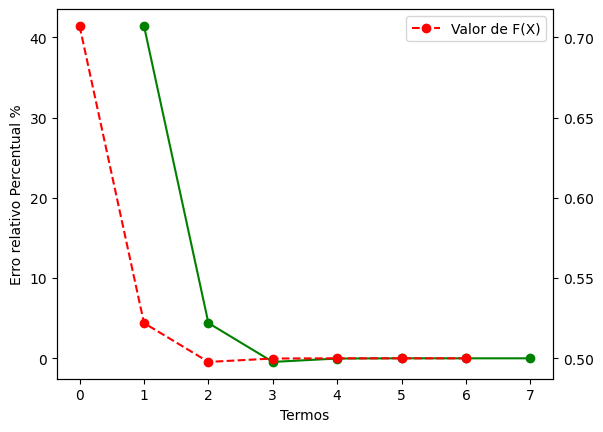

In [153]:
plt.plot(df['Termos'],df['Erro'], 'go-')
plt.xlabel('Termos')
plt.ylabel('Erro relativo Percentual %')
ay2 = plt.twinx()
ay2.plot(df['F(X)'],'ro--', label='Valor de F(X)')
plt.legend()
plt.show()

O gráfico em verde representa o valor do erro relativo em função da quantidade de termos da serie de taylor enquanto o gráfico
em vermelho representa o valor da aproximação em função do número de termos. Sendo assim, concluimos o quão útil é a série de Taylor para determinação de valores de funções polinomiais